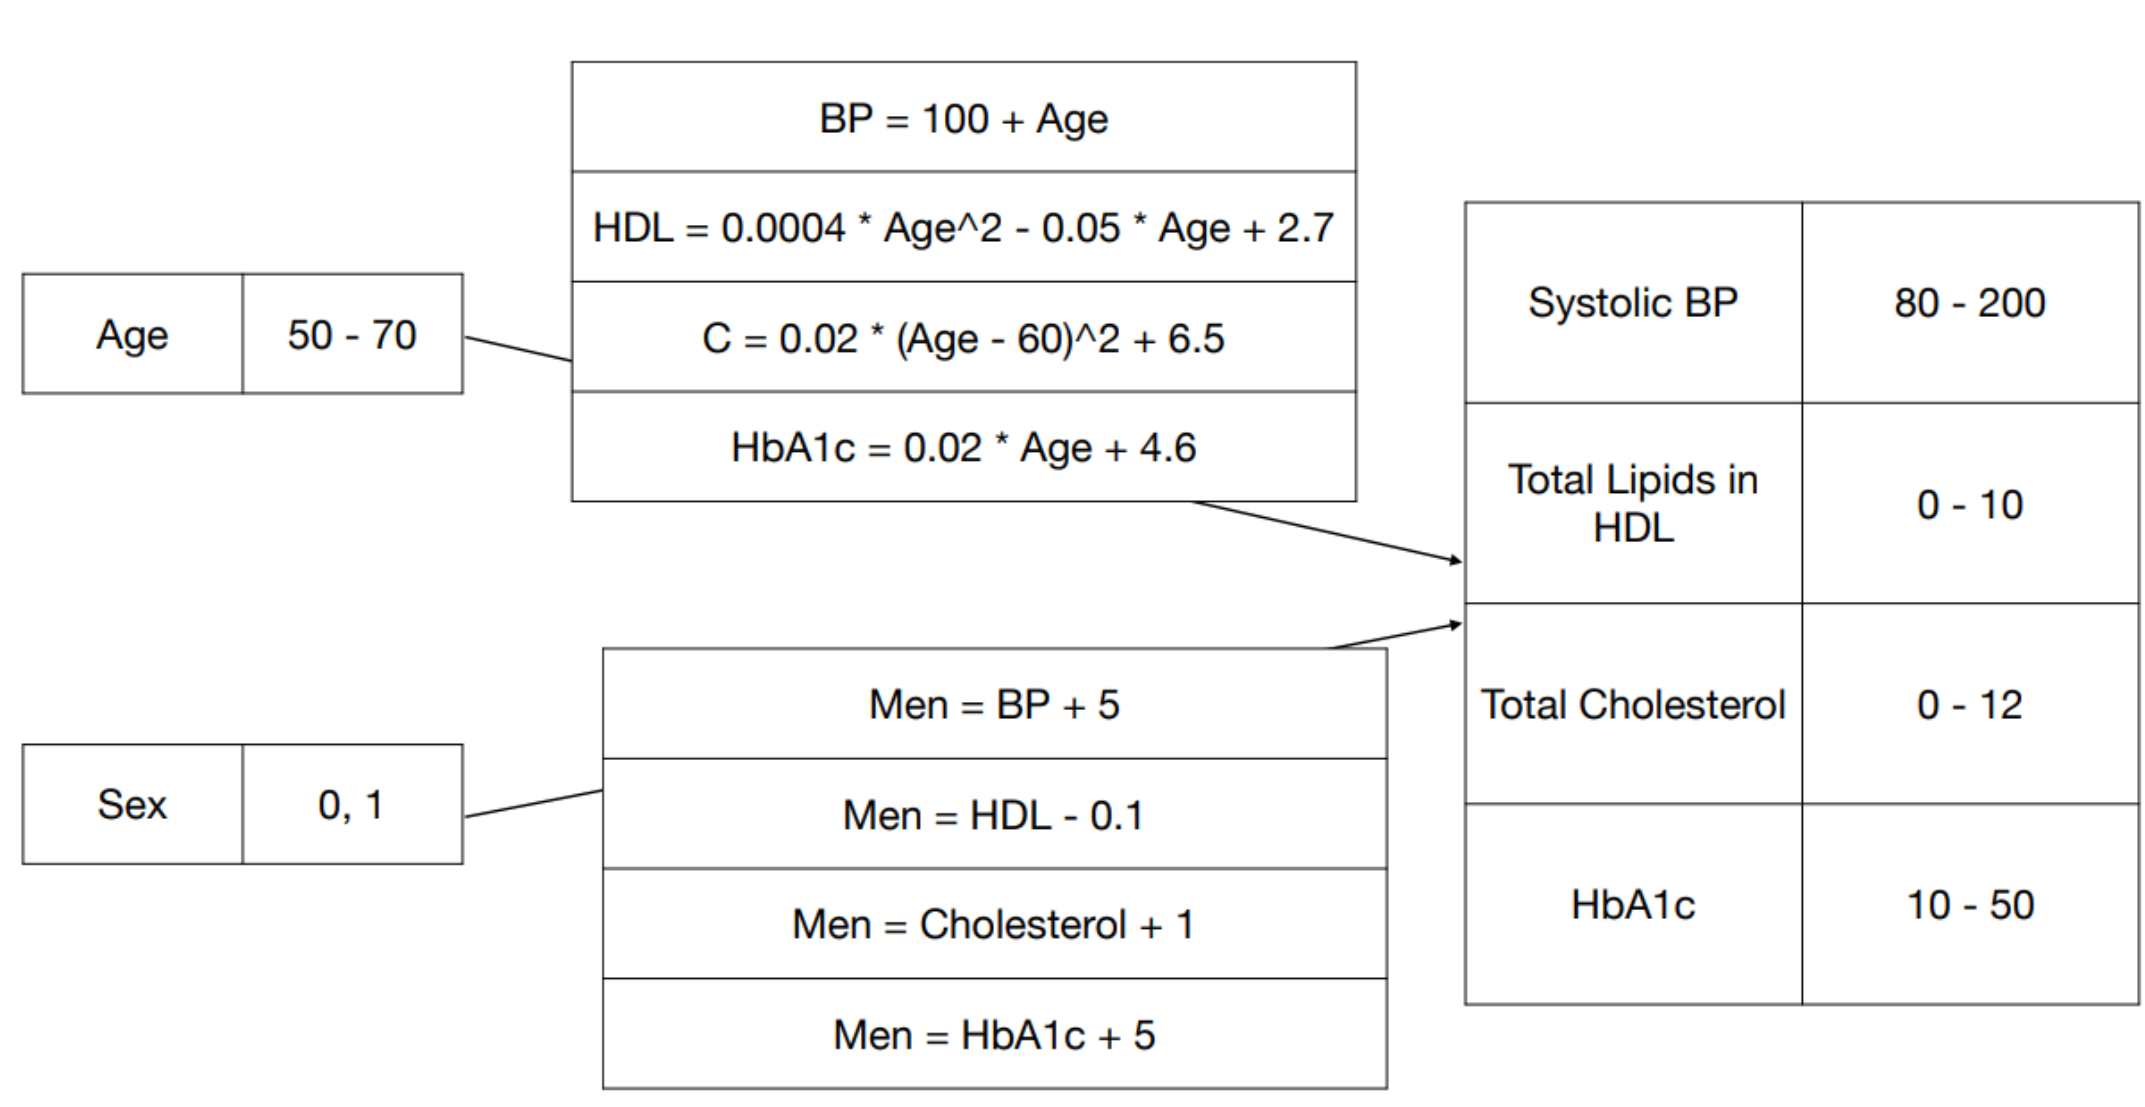

In [ ]:

HbA1c= SI + LS(sex)+ LS(age)

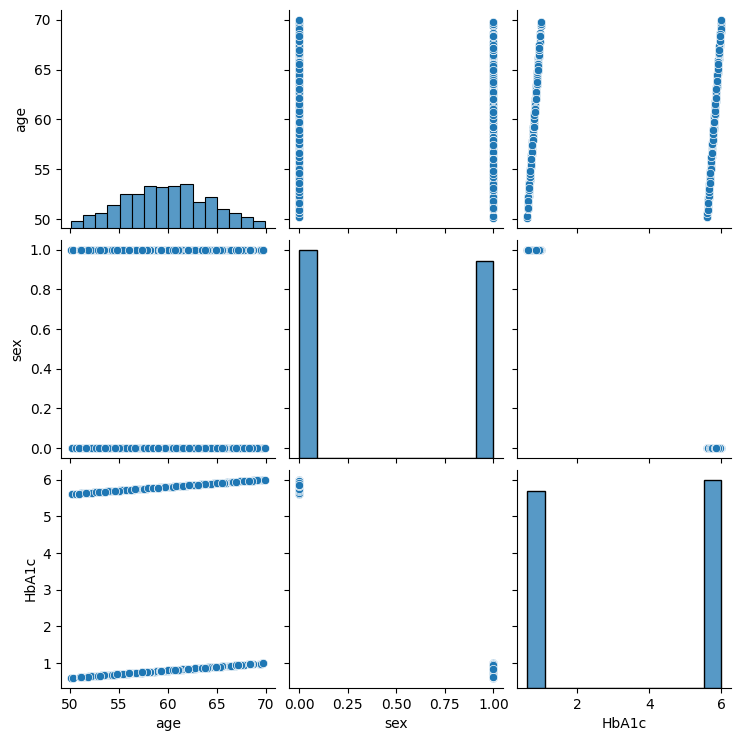

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
n=100_000
# Define inputs
n = 1000
np.random.seed(0)

mean, sd = 60, 5
age = []
while len(age) < n:
    sample = np.random.normal(mean, sd, n)
    valid = sample[(sample >= 50) & (sample <= 70)]
    age.extend(valid)
age = np.array(age[:n])

sex = np.random.binomial(1, 0.5, n)

# Base model
hb_raw = 0.02 * age + 4.6 - 5 * sex

df = pd.DataFrame({'age': age, 'sex': sex, 'HbA1c': hb_raw})
df.head()
sns.pairplot(df)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     1000 non-null   float64
 1   sex     1000 non-null   int64  
 2   HbA1c   1000 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [13]:
from sklearn.model_selection import train_test_split
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

In [ ]:
import os
from utils.configuration import *

In [ ]:
experiment_name = "api_ordinal_simple"      ## <--- set experiment name
LOG_DIR="/home/bule/TramDag/dev_experiment_logs"  ## <--- set log directory
EXPERIMENT_DIR = os.path.join(LOG_DIR, experiment_name)
CONF_DICT_PATH = os.path.join(EXPERIMENT_DIR, f"configuration.json")

In [ ]:
setup_configuration(experiment_name,EXPERIMENT_DIR)


In [ ]:
data_type={'x':'continous','y':'ordinal_Xc_Yo'}
data_type

In [ ]:
write_data_type_to_configuration(data_type, CONF_DICT_PATH)

In [ ]:
interactive_adj_matrix(CONF_DICT_PATH,seed=19)

In [ ]:
interactive_nn_names_matrix(CONF_DICT_PATH, seed=5)

In [ ]:
from utils.tramdag import TramDagConfig , TramDagModel

cfg = TramDagConfig.load("/home/bule/TramDag/dev_experiment_logs/api_ordinal_simple/configuration.json")
cfg.compute_levels(train_df)
device='cpu'